In [199]:
import pandas as pd
pima = pd.read_csv("io1.csv")

#data = arff.loadarff('4.doc')
#df = pd.DataFrame(data[0])

print(pima.head())

   SFH  popUpWidnow   SSLfinal_State   Request_URL   URL_of_Anchor  \
0    1            -1               1            -1              -1   
1   -1            -1              -1            -1              -1   
2    1            -1               0             0              -1   
3    1             0               1            -1              -1   
4   -1            -1               1            -1               0   

    web_traffic  URL_Length  age_of_domain  having_IP_Address  Result  
0             1           1              1                  0       0  
1             0           1              1                  1       1  
2             0          -1              1                  0       1  
3             0           1              1                  0       0  
4             0          -1              1                  0       1  


In [185]:
feature_s=['SFH','popUpWidnow ','SSLfinal_State',' Request_URL',' URL_of_Anchor',' web_traffic','URL_Length','age_of_domain','having_IP_Address'] 
X=pima[feature_s]
y=pima['Result']


In [177]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)
print(X_train[:10])

      SFH  popUpWidnow   SSLfinal_State   Request_URL   URL_of_Anchor  \
981     1             0              -1            -1              -1   
1015   -1            -1              -1            -1              -1   
16     -1             0               0             0              -1   
1128    1             1              -1             1               1   
569    -1            -1              -1             0              -1   
1268    1             1               1            -1               1   
901    -1            -1               1            -1              -1   
642     1             1               1            -1               1   
984    -1             1               1             0               0   
351     1            -1               1             1               1   

       web_traffic  URL_Length  age_of_domain  having_IP_Address  
981              0           0             -1                  0  
1015             0           0             -1                 

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

print(X_train[X_train.isnull().any(axis=1)])
# instantiate the model (using the default parameters)
logisticRegr = LogisticRegression()

#print(X_train[:10])
#le = LabelEncoder()
#print(X_train['SFH'])
#X_train['SFH'] = (X_train['SFH'].astype(float))
#x_train = le.fit_transform(X_train)
# X_train['bp'] = (X_train['bp'].astype(float))
# X_train['bmi'] = le.fit_transform(X_train['bmi'])
# X_train['insulin'] = le.fit_transform(X_train['insulin'])
# X_train['pregnant'] = le.fit_transform(X_train['pregnant'])
# # X_train['age'] = (X_train['age'].astype(float))
# X_train['glucose'] = le.fit_transform(X_train['glucose'])
# X_train['age'] = le.fit_transform(X_train['age'])
# # gluc = (X_train.loc[:,'glucose'])
# # print(type(gluc))
# # print(gluc)
# # print(float(gluc))
# # X_train['glucose'] = (X_train['glucose'].str.strip().astype(float))


logisticRegr.fit(X_train, y_train)

y_pred=logisticRegr.predict(X_test)

Empty DataFrame
Columns: [SFH, popUpWidnow , SSLfinal_State,  Request_URL,  URL_of_Anchor,  web_traffic, URL_Length, age_of_domain, having_IP_Address]
Index: []


C:\Users\ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [181]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[174   1  29]
 [ 17   1  15]
 [ 24   0 145]]


In [182]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

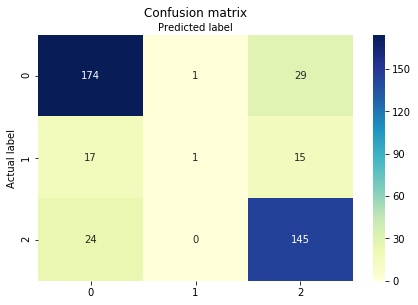

In [183]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')